# 서포트 벡터 머신(Support Vector Machines)

* 회귀, 분류, 이상치 탐지 등에 사용되는 지도학습 방법
* 클래스 사이의 경계에 위치한 데이터 포인트를 서포트 벡터(support vector)라고 함
* 각 서포트 벡터가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 학습
* 각 서포트 벡터 사이의 마진이 가장 큰 방향으로 학습
* 서포트 벡터까지의 거리와 서포트 벡터의 중요도를 기반으로 예측을 수행
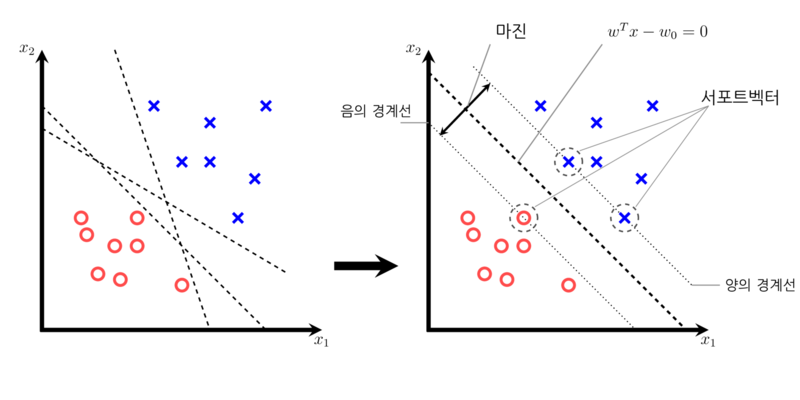
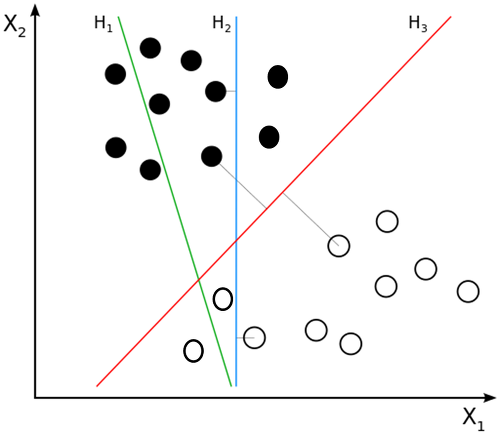
* 마진이 큰 방향으로 서포트 벡터는 계속 학습하게 된다.


In [1]:
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_3908/265178491.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid'])


In [2]:
# Support Vector Regression : 회귀 모델
# Support Vector Classification : 분류 모델
from sklearn.svm import SVR, SVC  
from sklearn.datasets import  load_diabetes, load_iris
from sklearn.datasets import load_breast_cancer, load_wine
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.manifold import TSNE

In [3]:
# 보스턴 주택 가격 데이터 가져오기
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

boston_df = pd.read_csv(
    filepath_or_buffer="http://lib.stat.cmu.edu/datasets/boston",
    delim_whitespace=True,
    skiprows=21,
    header=None,
)

columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

#Flatten all the values into a single long list and remove the nulls
values_w_nulls = boston_df.values.flatten()
all_values = values_w_nulls[~np.isnan(values_w_nulls)]

#Reshape the values to have 14 columns and make a new boston_df out of them
boston_df = pd.DataFrame(
    data = all_values.reshape(-1, len(columns)),
    columns = columns,
)

# SVM을 이용한 회귀 모델과 분류 모델

## SVR : SVM을 사용한 회귀 모델

In [4]:
X, y = boston_df.iloc[:, :-1], boston_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [5]:
model = SVR()  
model.fit(X_train, y_train)

print("학습 데이터 점수 : {}" .format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}" .format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.2177283706374875
평가 데이터 점수 : 0.13544178468518187


## SVC : SVM을 사용한 분류 모델

In [6]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [7]:
model = SVC()  
model.fit(X_train, y_train)

print("학습 데이터 점수 : {}" .format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}" .format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.9014084507042254
평가 데이터 점수 : 0.9230769230769231


## 커널 기법

* 입력 데이터를 고차원 공간에 mapping해서 비선형 특징을 학습할 수 있도록 확장하는 방법
* scikit-learn에서 `Linear`(선형 형태로 분류), `Polynomial`(비선형 형태로 분류), `RBF`(Radial Basis Function)(비선형 형태로 분류)등 다양한 커널 기법을 지원, `Sigmoid`, 등등

In [8]:
X, y = boston_df.iloc[:, :-1], boston_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, y_train)
print("Linear SVR 학습 데이터 점수 : {}" .format(linear_svr.score(X_train, y_train)))
print("Linear SVR 평가 데이터 점수 : {}" .format(linear_svr.score(X_test, y_test)))

polynomial_svr = SVR(kernel='poly')
polynomial_svr.fit(X_train, y_train)
print("Polynomial SVR 학습 데이터 점수 : {}" .format(polynomial_svr.score(X_train, y_train)))
print("Polynomial SVR 평가 데이터 점수 : {}" .format(polynomial_svr.score(X_test, y_test)))

rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(X_train, y_train)
print("RBF SVR 학습 데이터 점수 : {}" .format(rbf_svr.score(X_train, y_train)))
print("RBF SVR 평가 데이터 점수 : {}" .format(rbf_svr.score(X_test, y_test)))


Linear SVR 학습 데이터 점수 : 0.7155065522120606
Linear SVR 평가 데이터 점수 : 0.638039631835579
Polynomial SVR 학습 데이터 점수 : 0.2024454261446288
Polynomial SVR 평가 데이터 점수 : 0.13366845036746255
RBF SVR 학습 데이터 점수 : 0.2177283706374875
RBF SVR 평가 데이터 점수 : 0.13544178468518187


In [9]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train, y_train)
print("Linear SVC 학습 데이터 점수 : {}" .format(linear_svc.score(X_train, y_train)))
print("Linear SVC 평가 데이터 점수 : {}" .format(linear_svc.score(X_test, y_test)))

polynomial_svc = SVC(kernel='poly')
polynomial_svc.fit(X_train, y_train)
print("Polynomial SVC 학습 데이터 점수 : {}" .format(polynomial_svc.score(X_train, y_train)))
print("Polynomial SVC 평가 데이터 점수 : {}" .format(polynomial_svc.score(X_test, y_test)))

rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train, y_train)
print("RBF SVC 학습 데이터 점수 : {}" .format(rbf_svc.score(X_train, y_train)))
print("RBF SVC 평가 데이터 점수 : {}" .format(rbf_svc.score(X_test, y_test)))


Linear SVC 학습 데이터 점수 : 0.960093896713615
Linear SVC 평가 데이터 점수 : 0.986013986013986
Polynomial SVC 학습 데이터 점수 : 0.9014084507042254
Polynomial SVC 평가 데이터 점수 : 0.9230769230769231
RBF SVC 학습 데이터 점수 : 0.9014084507042254
RBF SVC 평가 데이터 점수 : 0.9230769230769231


## 매개변수 튜닝

* SVM은 사용하는 커널에 따라 다양한 매개변수 설정 가능
* 매개변수를 변경하면서 성능변화를 관찰

In [10]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

### 매개변수 없이 학습

In [11]:
polynomial_svc = SVC(kernel='poly')
polynomial_svc.fit(X_train, y_train)

print("Polynomial SVC 학습 데이터 점수 : {}" .format(polynomial_svc.score(X_train, y_train)))
print("Polynomial SVC 평가 데이터 점수 : {}" .format(polynomial_svc.score(X_test, y_test)))

Polynomial SVC 학습 데이터 점수 : 0.9014084507042254
Polynomial SVC 평가 데이터 점수 : 0.9230769230769231


In [12]:
rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train, y_train)

print("RBF SVC 학습 데이터 점수 : {}" .format(rbf_svc.score(X_train, y_train)))
print("RBF SVC 평가 데이터 점수 : {}" .format(rbf_svc.score(X_test, y_test)))

RBF SVC 학습 데이터 점수 : 0.9014084507042254
RBF SVC 평가 데이터 점수 : 0.9230769230769231


### 매개변수 부여

In [13]:
polynomial_svc = SVC(kernel='poly', degree=2, C=0.1, gamma='auto')
polynomial_svc.fit(X_train, y_train)

print("Polynomial SVC 학습 데이터 점수 : {}" .format(polynomial_svc.score(X_train, y_train)))
print("Polynomial SVC 평가 데이터 점수 : {}" .format(polynomial_svc.score(X_test, y_test)))

Polynomial SVC 학습 데이터 점수 : 0.9835680751173709
Polynomial SVC 평가 데이터 점수 : 0.993006993006993


In [14]:
rbf_svc = SVC(kernel='rbf', C=2.0, gamma='scale')
rbf_svc.fit(X_train, y_train)

print("RBF SVC 학습 데이터 점수 : {}" .format(rbf_svc.score(X_train, y_train)))
print("RBF SVC 평가 데이터 점수 : {}" .format(rbf_svc.score(X_test, y_test)))

RBF SVC 학습 데이터 점수 : 0.9154929577464789
RBF SVC 평가 데이터 점수 : 0.9370629370629371


## 데이터 전처리

* SVM은 입력 데이터가 정규화되어야 좋은 성능을 보임
* 주로 모든 특성 값을 [0, 1]범위로 맞추는 방법을 사용
* StandardScaler 또는 MinMacScaler를 사용해 정규화

### 전처리 전

In [15]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [16]:
model = SVC()
model.fit(X_train, y_train)

print("SVC 학습 데이터 점수 : {}" .format(model.score(X_train, y_train)))
print("SVC 평가 데이터 점수 : {}" .format(model.score(X_test, y_test)))

SVC 학습 데이터 점수 : 0.9014084507042254
SVC 평가 데이터 점수 : 0.9230769230769231


### 전처리 후

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = SVC()
model.fit(X_train, y_train)

print("SVC 학습 데이터 점수 : {}" .format(model.score(X_train, y_train)))
print("SVC 평가 데이터 점수 : {}" .format(model.score(X_test, y_test)))

# 성능이 좋아짐.

SVC 학습 데이터 점수 : 0.9835680751173709
SVC 평가 데이터 점수 : 0.986013986013986


In [18]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = SVC()
model.fit(X_train, y_train)

print("SVC 학습 데이터 점수 : {}" .format(model.score(X_train, y_train)))
print("SVC 평가 데이터 점수 : {}" .format(model.score(X_test, y_test)))

# 성능이 좋아짐.

SVC 학습 데이터 점수 : 0.9812206572769953
SVC 평가 데이터 점수 : 0.986013986013986


# Linear SVR

## 보스톤 주택 가격

In [19]:
# 보스턴 주택 가격 데이터 가져오기
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

boston_df = pd.read_csv(
    filepath_or_buffer="http://lib.stat.cmu.edu/datasets/boston",
    delim_whitespace=True,
    skiprows=21,
    header=None,
)

columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

#Flatten all the values into a single long list and remove the nulls
values_w_nulls = boston_df.values.flatten()
all_values = values_w_nulls[~np.isnan(values_w_nulls)]

#Reshape the values to have 14 columns and make a new boston_df out of them
boston_df = pd.DataFrame(
    data = all_values.reshape(-1, len(columns)),
    columns = columns,
)

X, y = boston_df.iloc[:, :-1], boston_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [22]:
print("학습 데이터 점수 : {}" .format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}" .format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.7308981278396034
평가 데이터 점수 : 0.5700530412646508


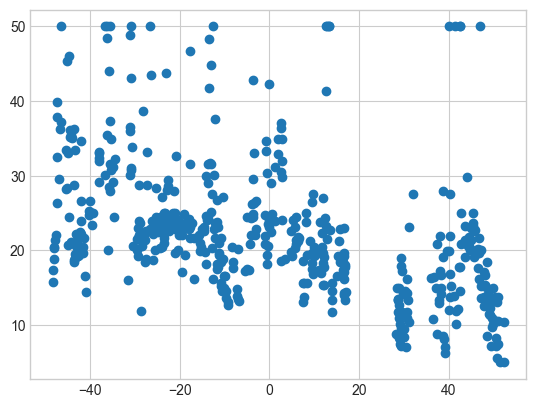

In [23]:
# SVM이 차원을 늘려서 공간상에서 맵핑한 다음에 나누기 때문에
# 그것을 눈으로 보기 위해 저차원 변환을 해야 한다.

# 보스턴 데이터에 대한 저차원 변환
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

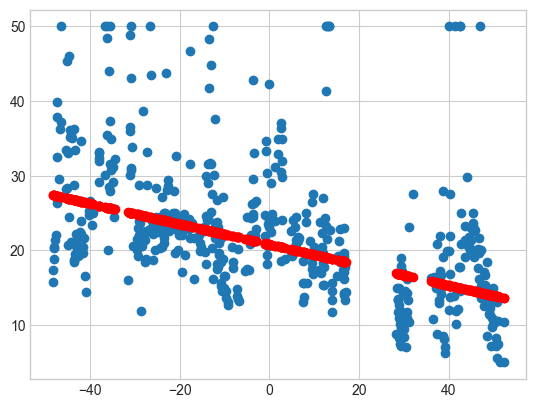

In [24]:
model.fit(X_comp, y)

predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r')

In [25]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='linear'))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5, n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    1.1s remaining:    1.7s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    1.1s finished


{'fit_time': array([0.00717402, 0.01290393, 0.00678992, 0.00712299, 0.00777817]),
 'score_time': array([0.00111103, 0.00141692, 0.00216722, 0.00127673, 0.00155687]),
 'test_score': array([0.76908568, 0.72180141, 0.56428426, 0.14083339, 0.07810211])}

In [26]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVR(kernel='linear'))
])

param_grid = [{
    'model__gamma' : ['scale', 'auto'],
    'model__C' : [1.0, 0.1, 0.01],
    'model__epsilon' : [1.0, 0.1, 0.01] 
}]

grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5, verbose=True
)

grid_search.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [27]:
grid_search.best_estimator_

# C=0.1, epsilon=1.0, gamma='scale'(default)이 최적의 parameter

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.1, epsilon=1.0, kernel='linear'))])

## 당뇨병 데이터

In [28]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [31]:
print("학습 데이터 점수 : {}" .format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}" .format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.5083942426445287
평가 데이터 점수 : 0.5129545386522352


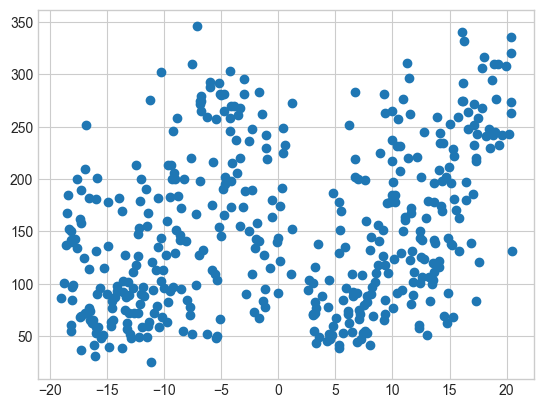

In [32]:
# SVM이 차원을 늘려서 공간상에서 맵핑한 다음에 나누기 때문에
# 그것을 눈으로 보기 위해 저차원 변환을 해야 한다.

# 당뇨병 데이터에 대한 저차원 변환
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

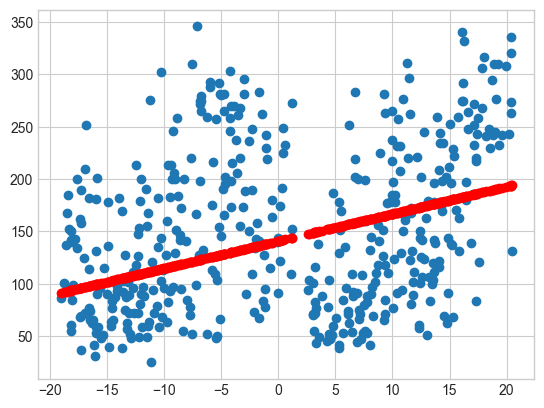

In [33]:
model.fit(X_comp, y)

predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r')

In [34]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='linear'))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5, n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00391793, 0.00275993, 0.00499892, 0.00258088, 0.00319004]),
 'score_time': array([0.00049806, 0.00047421, 0.00052285, 0.00044918, 0.00047278]),
 'test_score': array([0.43039087, 0.51655019, 0.48275821, 0.4224617 , 0.53077081])}

In [35]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVR(kernel='linear'))
])

param_grid = [{
    'model__gamma' : ['scale', 'auto'],
    'model__C' : [1.0, 0.1, 0.01],
    'model__epsilon' : [1.0, 0.1, 0.01] 
}]

grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5, verbose=True
)

grid_search.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [36]:
grid_search.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, kernel='linear'))])

# Kernel SVR

## 보스턴 주택 가격

In [37]:
# 보스턴 주택 가격 데이터 가져오기
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

boston_df = pd.read_csv(
    filepath_or_buffer="http://lib.stat.cmu.edu/datasets/boston",
    delim_whitespace=True,
    skiprows=21,
    header=None,
)

columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

#Flatten all the values into a single long list and remove the nulls
values_w_nulls = boston_df.values.flatten()
all_values = values_w_nulls[~np.isnan(values_w_nulls)]

#Reshape the values to have 14 columns and make a new boston_df out of them
boston_df = pd.DataFrame(
    data = all_values.reshape(-1, len(columns)),
    columns = columns,
)

X, y = boston_df.iloc[:, :-1], boston_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [38]:
# 전처리
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
# 'linear'가 아니라 'rbf'로 (default : 'rbf')
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

SVR()

In [40]:
print("학습 데이터 점수 : {}" .format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}" .format(model.score(X_test, y_test)))

# kernel='linear'보다 더 안좋게 나옴

학습 데이터 점수 : 0.6455166227379755
평가 데이터 점수 : 0.701381305573991


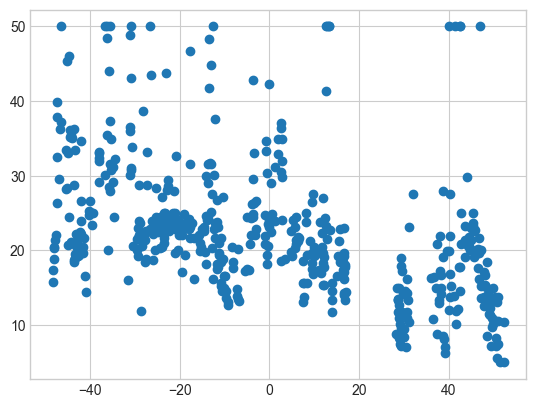

In [41]:
# SVM이 차원을 늘려서 공간상에서 맵핑한 다음에 나누기 때문에
# 그것을 눈으로 보기 위해 저차원 변환을 해야 한다.

# 보스턴 데이터에 대한 저차원 변환
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

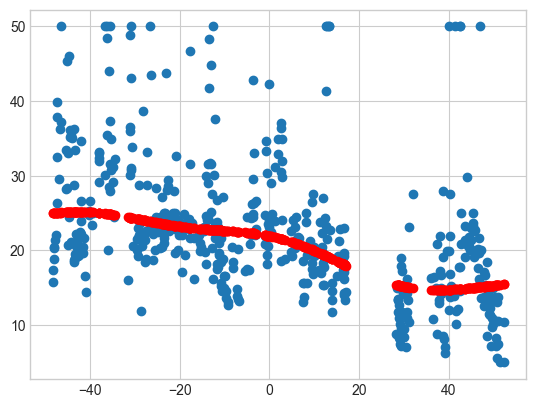

In [42]:
model.fit(X_comp, y)

predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r')

# kernel='rbf'로 줬기 때문에 비선형 특성으로 나왔다.

In [43]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='rbf'))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5, n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00525379, 0.00524592, 0.00562787, 0.0047431 , 0.00553083]),
 'score_time': array([0.00213718, 0.00199294, 0.00190806, 0.00197697, 0.00202012]),
 'test_score': array([ 0.75781445,  0.50211018,  0.04310107,  0.33851703, -0.75997942])}

### model kernel에 대한 최적의 hyper parameter 찾기

In [44]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVR(kernel='rbf'))
])

# model kernel 옵션만 부여.
param_grid = [{
    'model__kernel' : ['rbf', 'polynomial', 'sigmoid']
}]

grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5, verbose=True
)

grid_search.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Library/Frameworks/Python.framework/Versi

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=8,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             verbose=True)

In [45]:
print(grid_search.best_estimator_)

# kernel 옵션을 부여하지 않으면, 'rbf'가 default
# kernel은 rbf가 최적의 성능을 보임을 알 수 있다.

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR())])


### kernel을 RBF로 고정

In [46]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVR(kernel='rbf'))
])

# model kernel 옵션만 부여.
param_grid = [{
    'model__gamma' : ['scale', 'auto'],
    'model__C' : [1.0, 0.1, 0.01],
    'model__epsilon' : [1.0, 0.1, 0.01]
}]

grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5, verbose=True
)

grid_search.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [47]:
grid_search.best_estimator_

# epsilon=0.01, C=1.0(default), gamma='scale'(default) 이 최적의 parameter

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR(epsilon=0.01))])

## 당뇨병 데이터

In [48]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [49]:
# 전처리
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
# 'linear'가 아니라 'rbf'로 (default : 'rbf')
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

SVR()

In [51]:
print("학습 데이터 점수 : {}" .format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}" .format(model.score(X_test, y_test)))

# kernel='linear'보다 더 안좋게 나옴

학습 데이터 점수 : 0.1693031556742166
평가 데이터 점수 : 0.21690881432598275


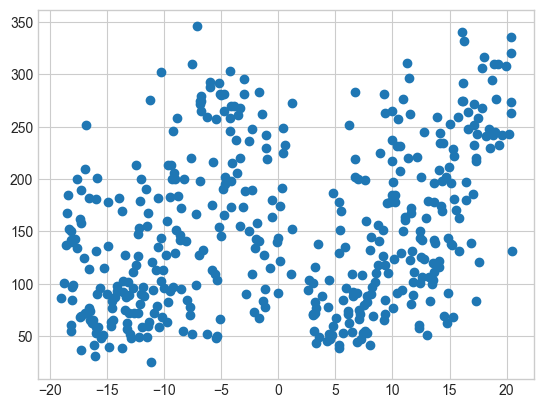

In [52]:
# SVM이 차원을 늘려서 공간상에서 맵핑한 다음에 나누기 때문에
# 그것을 눈으로 보기 위해 저차원 변환을 해야 한다.

# 보스턴 데이터에 대한 저차원 변환
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

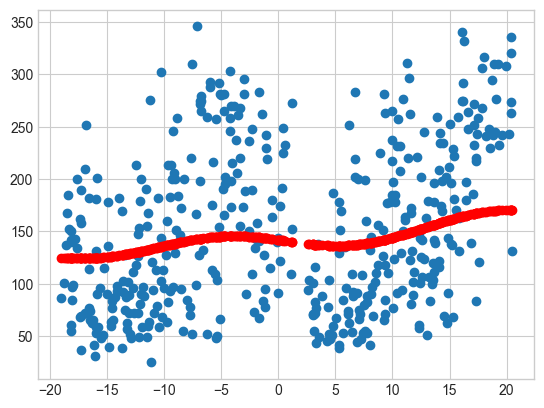

In [53]:
model.fit(X_comp, y)

predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r')

# kernel='rbf'로 줬기 때문에 비선형 특성으로 나왔다.

In [54]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='rbf'))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5, n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00316715, 0.00286102, 0.00284791, 0.00295496, 0.00276709]),
 'score_time': array([0.0012939 , 0.00124907, 0.00121307, 0.00121689, 0.00117517]),
 'test_score': array([0.14580768, 0.12539699, 0.18163843, 0.12222929, 0.15792104])}

### model kernel에 대한 최적의 hyper parameter 찾기

In [55]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVR(kernel='rbf'))
])

# model kernel 옵션만 부여.
param_grid = [{
    'model__kernel' : ['rbf', 'polynomial', 'sigmoid']
}]

grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5, verbose=True
)

grid_search.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Library/Frameworks/Python.framework/Versi

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=8,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             verbose=True)

In [56]:
print(grid_search.best_estimator_)

# 'sigmoid'가 가장 최적의 kernel 

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR(kernel='sigmoid'))])


### kernel을 sigmoid로 고정

In [57]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVR(kernel='sigmoid'))
])

# model kernel 옵션만 부여.
param_grid = [{
    'model__gamma' : ['scale', 'auto'],
    'model__C' : [1.0, 0.1, 0.01],
    'model__epsilon' : [1.0, 0.1, 0.01]
}]

grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5, verbose=True
)

grid_search.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='sigmoid'))]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [58]:
print(grid_search.best_estimator_)

# epsilon=1.0, C=1.0(default), gamma='scale'(default) 이 최적의 parameter

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, kernel='sigmoid'))])


### 최적의 모델에 적합

In [59]:
model = grid_search.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, kernel='sigmoid'))])

In [60]:
print("학습 데이터 점수 : {}" .format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}" .format(model.score(X_test, y_test)))

# 아까 
# 학습 데이터 점수 : 0.1786776543845896
# 평가 데이터 점수 : 0.1466157990894814
# 보다는 잘 나온 것을 확인

학습 데이터 점수 : 0.3743126645363364
평가 데이터 점수 : 0.39943280688107774


# Linear SVC

## 유방암

In [61]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [62]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [64]:
print("학습 데이터 점수 : {}" .format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}" .format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.9912087912087912
평가 데이터 점수 : 0.9649122807017544


In [79]:
def make_meshgrid(x, y, h=0.02) :
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    return xx, yy

In [80]:
def plot_contours(clf, xx, yy, **params) :
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

In [81]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

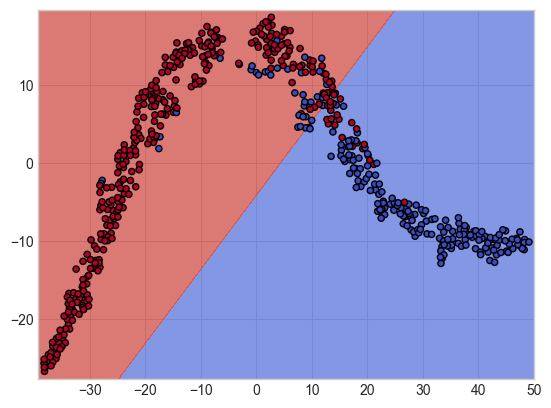

In [82]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [83]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='linear'))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5, n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00325394, 0.00230289, 0.00275493, 0.00245214, 0.00276399]),
 'score_time': array([0.00040603, 0.00039625, 0.0003438 , 0.00032711, 0.0008657 ]),
 'test_score': array([0.96491228, 0.98245614, 0.96491228, 0.96491228, 0.98230088])}

In [84]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(kernel='linear'))
])

param_grid = [{
    'model__gamma' : ['scale', 'auto'],
    'model__C' : [1.0, 0.1, 0.01]
}]

grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5, verbose=True
)

grid_search.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [85]:
grid_search.best_estimator_

# C=0.1, gamma='scale' (default)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])

## 붓꽃

In [119]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [120]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [121]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [122]:
print("학습 데이터 점수 : {}" .format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}" .format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.975
평가 데이터 점수 : 1.0


In [123]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

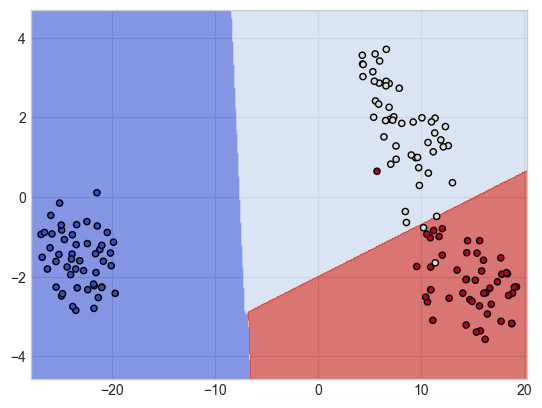

In [124]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [125]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5, n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.00430012, 0.00122595, 0.00247502, 0.00165105, 0.000741  ]),
 'score_time': array([0.00102592, 0.00120306, 0.00088596, 0.00034308, 0.00026798]),
 'test_score': array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])}

In [126]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(kernel='rbf'))
])

param_grid = [{
    'model__gamma' : ['scale', 'auto'],
    'model__C' : [1.0, 0.1, 0.01]
}]

grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5, verbose=True
)

grid_search.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [127]:
grid_search.best_estimator_

# C=1.0 (default), gamma='scale' (default)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])

## 와인

In [132]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [133]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [134]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [135]:
print("학습 데이터 점수 : {}" .format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}" .format(model.score(X_test, y_test)))

학습 데이터 점수 : 1.0
평가 데이터 점수 : 1.0


In [136]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

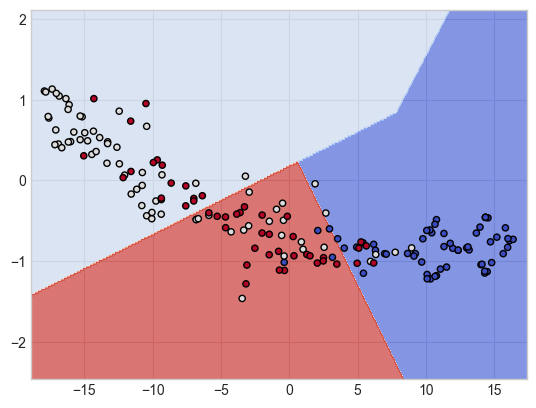

In [137]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [138]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='linear'))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5, n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00124502, 0.00128984, 0.00118494, 0.00122213, 0.00087976]),
 'score_time': array([0.00033092, 0.00034094, 0.00031328, 0.00029874, 0.00026536]),
 'test_score': array([0.94444444, 0.97222222, 0.97222222, 0.97142857, 0.94285714])}

In [108]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(kernel='linear'))
])

param_grid = [{
    'model__gamma' : ['scale', 'auto'],
    'model__C' : [1.0, 0.1, 0.01]
}]

grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5, verbose=True
)

grid_search.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [109]:
grid_search.best_estimator_

# C=0.1, gamma='scale' (default)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])

# Kernel SVC

## 붓꽃

In [141]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [142]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [143]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [144]:
print("학습 데이터 점수 : {}" .format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}" .format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.9833333333333333
평가 데이터 점수 : 0.9666666666666667


In [145]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

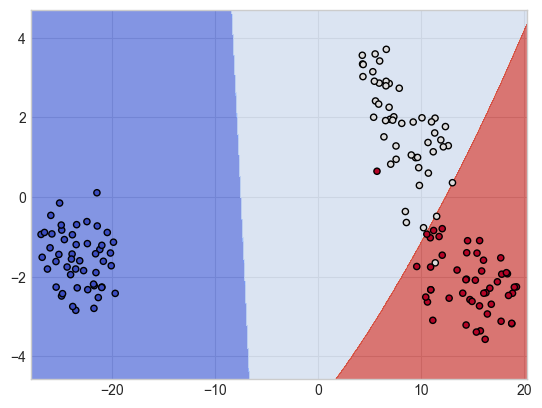

In [146]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [148]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5, n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.2s finished


{'fit_time': array([0.00116181, 0.00074697, 0.0007391 , 0.00068903, 0.00104403]),
 'score_time': array([0.00036788, 0.00026703, 0.00028586, 0.00027418, 0.0003221 ]),
 'test_score': array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])}

In [149]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(kernel='rbf'))
])

param_grid = [{
    'model__gamma' : ['scale', 'auto'],
    'model__C' : [1.0, 0.1, 0.01]
}]

grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5, verbose=True
)

grid_search.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [150]:
grid_search.best_estimator_

# C=1.0(default), gamma='scale' (default)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])

## 와인

In [166]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [167]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [168]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [169]:
print("학습 데이터 점수 : {}" .format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}" .format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.9929577464788732
평가 데이터 점수 : 0.9722222222222222


In [170]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

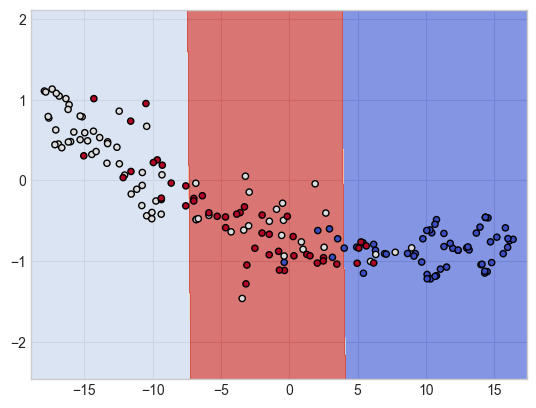

In [171]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [172]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5, n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.0010879 , 0.00078607, 0.00100398, 0.00076509, 0.00087714]),
 'score_time': array([0.00031209, 0.00027585, 0.00033092, 0.00031614, 0.00032997]),
 'test_score': array([1.        , 0.97222222, 0.94444444, 1.        , 1.        ])}

In [173]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(kernel='rbf'))
])

param_grid = [{
    'model__gamma' : ['scale', 'auto'],
    'model__C' : [1.0, 0.1, 0.01]
}]

grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5, verbose=True
)

grid_search.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [174]:
grid_search.best_estimator_

# C=1.0(default), gamma='scale' (default)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])